In [ ]:
!pip install langchain groq langchain-groq




In [ ]:
from langchain_groq import ChatGroq
from langchain.prompts import ChatPromptTemplate


groq_api_key = "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"


llm = ChatGroq(
    api_key=groq_api_key,
    model_name="llama3-8b-8192"
)


prompt_template = ChatPromptTemplate.from_messages([
    ("system", "You are a helpful assistant for a restaurant named SteamNoodles."),
    ("user", "Here is a customer review:\n\n\"{review}\"\n\n1. Identify the sentiment (positive/negative/neutral).\n2. Generate a short, polite response from the restaurant based on the sentiment and content.")
])

def generate_feedback_response(review: str):
    prompt = prompt_template.format_messages(review=review)
    response = llm(prompt)
    return response.content


sample_review = input("Enter customer review: ")
reply = generate_feedback_response(sample_review)
print("\nGenerated Response:\n", reply)

Enter customer review: food is very good

Generated Response:
 Sentiment: Positive

Response:

"Thank you so much for taking the time to share your thoughts about your dining experience at SteamNoodles! We're thrilled to hear that you enjoyed your meal. We're passionate about serving the best steamed noodles in town, and it's wonderful to know that our efforts are paying off. We appreciate your support and look forward to welcoming you back soon!"


In [ ]:
!pip install pandas matplotlib seaborn

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving reviews.csv to reviews (1).csv


In [ ]:
import pandas as pd

# Load uploaded file
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename, parse_dates=["Review Date"])

# Rename or preview columns
print(df.columns)
df.head()


Index(['Review Date', 'Review Text', 'Rating'], dtype='object')


,Review Date,Review Text,Rating
0,2024-03-04,Had an amazing dinner with family. Today our s...,5.0
1,2024-03-04,Tonight dinner was wonderful dinner. I went my...,5.0
2,2024-03-04,Wide spread of buffet dinner. Really enjoyed i...,5.0
3,2024-02-27,Food at Seasonal taste was really delicious. P...,5.0
4,2024-02-26,It was a great experience considering both the...,5.0


In [ ]:
def rating_to_sentiment(r):
    if r >= 4:
        return "positive"
    elif r == 3:
        return "neutral"
    else:
        return "negative"

df["sentiment"] = df["Rating"].apply(rating_to_sentiment)

df = df.dropna(subset=["Review Date", "Rating"])


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_sentiment_trends(start_date: str, end_date: str):

    mask = (df['Review Date'] >= start_date) & (df['Review Date'] <= end_date)
    filtered = df.loc[mask].copy()

    filtered['date'] = filtered['Review Date'].dt.date

    sentiment_counts = filtered.groupby(['date', 'sentiment']).size().unstack(fill_value=0)

    plt.figure(figsize=(12,6))
    sns.lineplot(data=sentiment_counts)
    plt.title(f"Sentiment Trends from {start_date} to {end_date}")
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")
    plt.legend(title="Sentiment")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


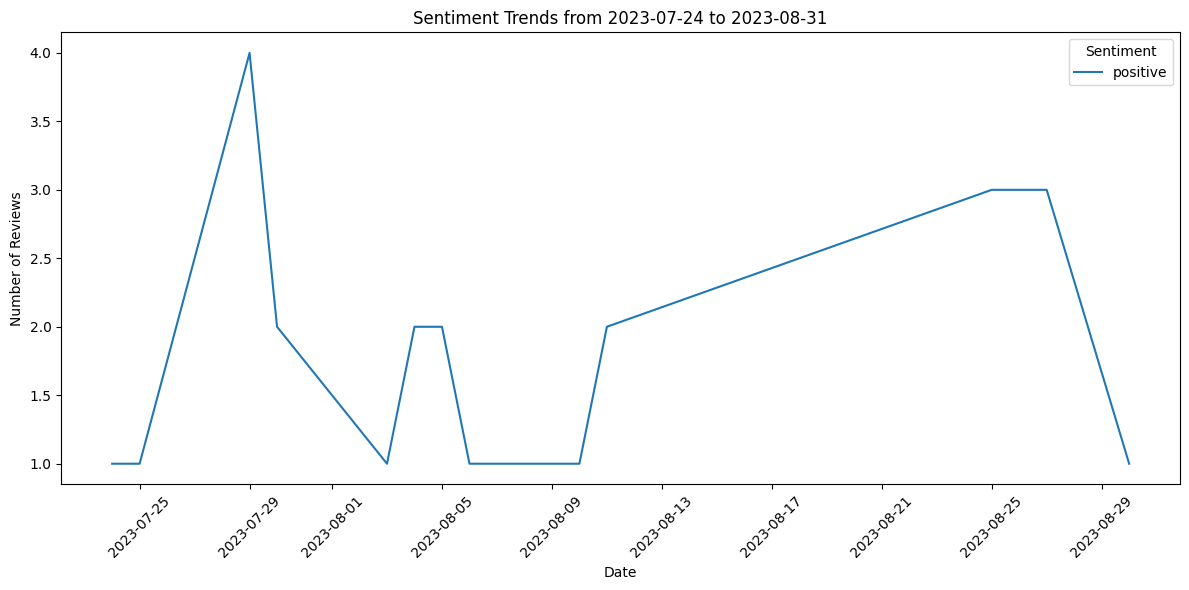

In [ ]:

plot_sentiment_trends("2023-07-24", "2023-08-31")
